In [1]:
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uvx = UVData()
uvy = UVData()
uvpx = UVData()
uvpy = UVData()

#Create constant variables
#Variable for the speed of light, with power adjusted for desired units
c = 0.299792
#Variable for speed of light in a cable correction factor, based on Google search
f = 2./3.

#Reference lines for plotting in the graphs
diagonals = np.linspace(0,130)
zero_line = np.linspace(0,0)
cable = np.linspace(150,150)

In [2]:
# Read in the xy data file
uvx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/combined_files/zen.grp1.of1.xy.LST.run_6.uvOCRSL.uvfits')

# Read in the yx data file
uvy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/combined_files/zen.grp1.of1.yx.LST.run_7.uvOCRSL.uvfits')

uvpx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_time_split_data/combined_files/zen.grp1.of1.xx.LST.run_1.uvOCRSL.uvfits')

uvpy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_yy_time_split_data/combined_files/zen.grp1.of1.yy.LST.run_1.uvOCRSL.uvfits')

#Create an array of antennas we want to flag
#flagged_antennas = [0,2,26,50,98,136]
flagged_antennas = np.array([0,2,26,50,98,136])

In [3]:
#Read in the position and antenna numbers for all antennas
antpos, ants = uvx.get_ENU_antpos()

#Ask the user to input the desired antenna
focus_ant = input("Which antenna would you like to look at? Enter here: ")
#Take the input and represent as an integer
focus_ant = int(focus_ant)
#Run a check that the number is valid
focus_ant = adp.check_antnum(antnum = focus_ant, ants = ants)

Which antenna would you like to look at? Enter here: 37
37


Ok, so the array has 1024 elements, and the delay times go from -5120 ns to 5110 ns. This corresponds to distance of -1.5e3 m to 1.5e3 m. 

The center element is 512. 

Baselines are ~15 m, or ~50 ns. If we have a window of 30 m to look for a baseline, that is ~100 ns. Going in each direction, we need the center 20 elements (because it counts by tens and so instead of 200 elements, it is only 20). 

However, we aren't just looking at baselines of 15 m, because we are also looking at antennas that are several baselines away. Our longest baseline is ~120m away, or 400ns. 

So for baseline dependency, we want to look at the elements on either side of 0 between, let's say, -410 and 410. This looks like: [471:554] 

To look at every that is not baseline dependent, we get: [:471],[554:]

We are going to use modifed versions of the make_max_arrays from ant_matrix. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


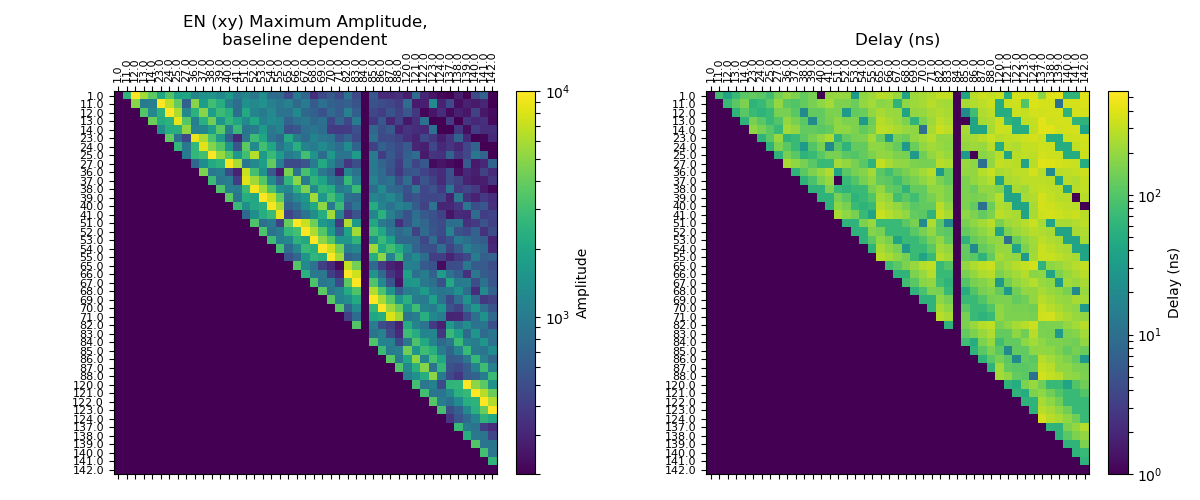

In [4]:
blin_amp_xy,blin_delay_xy = adp.make_blin_depd_arrays(uv = uvx)

print blin_delay_xy.shape
print blin_amp_xy.shape

blin_amp_matrix_xy, blin_delay_matrix_xy = adp.make_matrix_array(amp_array = blin_amp_xy, delay_array = blin_delay_xy)

print blin_amp_matrix_xy.shape
print blin_delay_matrix_xy.shape

adp.plot_matrix_array(amp_array = blin_amp_xy, amp_matrix = blin_amp_matrix_xy, delay_matrix = blin_delay_matrix_xy,
                      vmin = 1, vmax = 550, 
                      title = 'EN (xy) Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


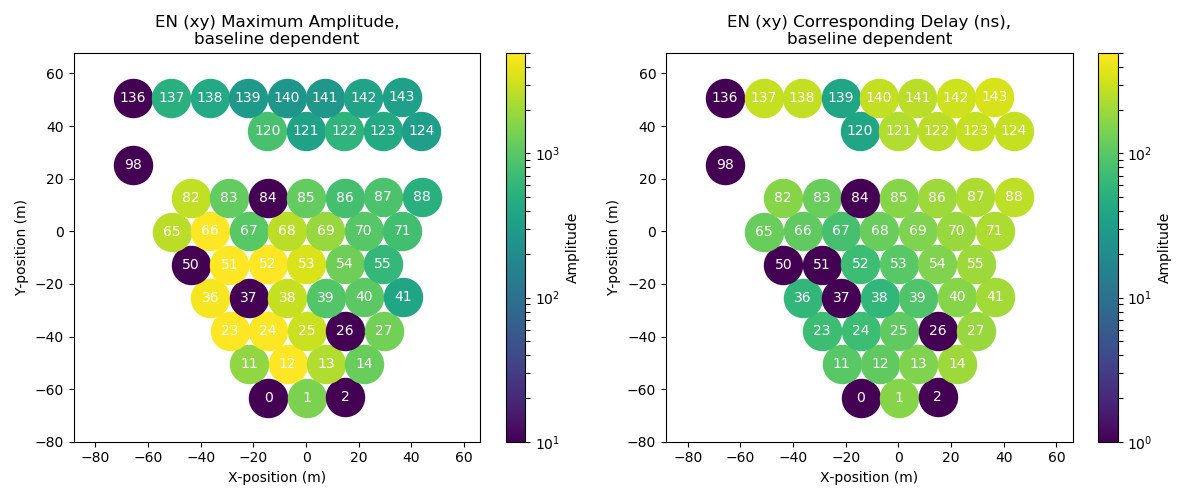

In [5]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_amp_xy, full_ant_delay_xy = adp.make_blin_depd_arrays(uv = uvx, keep_flags = True)
blin_ants_amp_xy, blin_ants_delay_xy, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp_xy, 
                                                                            delay_array = full_ant_delay_xy, 
                                                                            antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = blin_ants_amp_xy, delay_array = blin_ants_delay_xy, 
                        index = index, dindex = dindex, 
                        vmin = 1, vmax = 500, uv = uvx,
                        title1 = 'EN (xy) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'EN (xy) Corresponding Delay (ns),\nbaseline dependent')

We've been able to isolate the amplitudes that are baseline dependent, now it's time to look at everything else. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


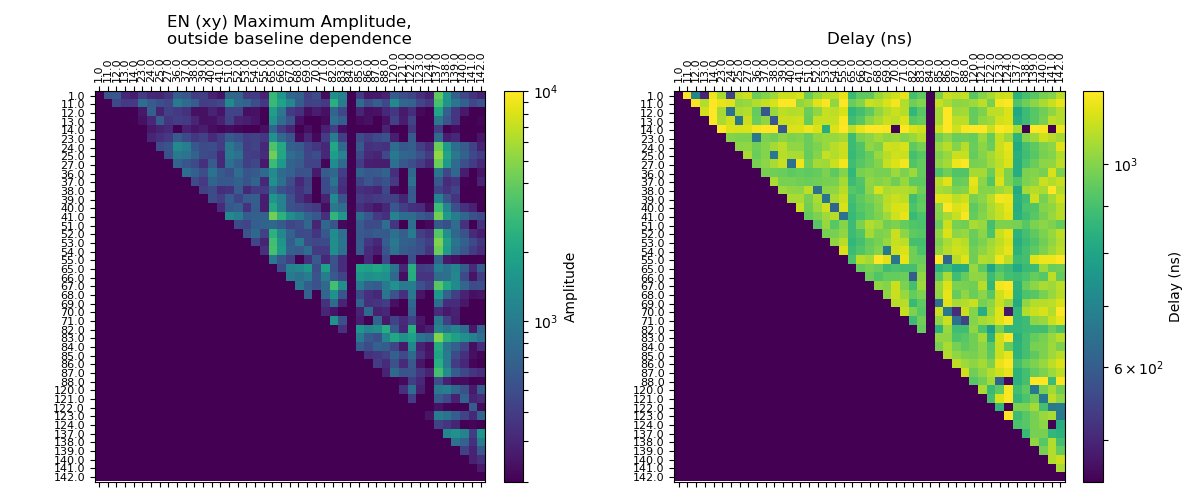

In [6]:
ind_amp_xy, ind_delay_xy = adp.make_blin_ind_arrays(uv = uvx)

print ind_delay_xy.shape
print ind_amp_xy.shape

ind_amp_matrix_xy, ind_delay_matrix_xy = adp.make_matrix_array(amp_array = ind_amp_xy, delay_array = ind_delay_xy)

print ind_amp_matrix_xy.shape
print ind_delay_matrix_xy.shape

adp.plot_matrix_array(amp_array = ind_amp_xy, amp_matrix = ind_amp_matrix_xy, delay_matrix = ind_delay_matrix_xy,
                      vmin = 450, vmax = 1200,
                      title = 'EN (xy) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


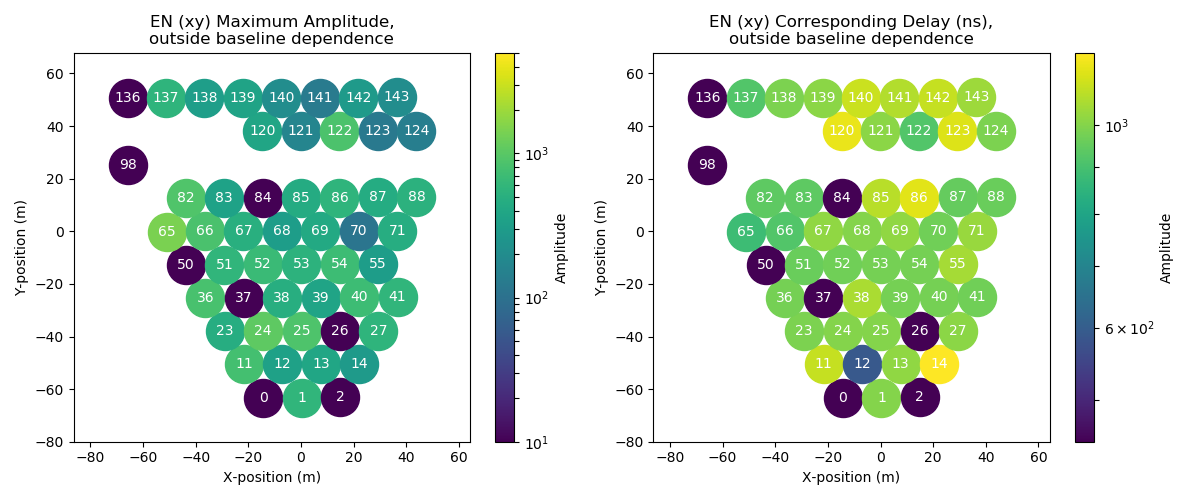

In [7]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_ind_amp_xy, full_ant_ind_delay_xy = adp.make_blin_ind_arrays(uv = uvx, keep_flags=True)
ind_ants_amp_xy, ind_ants_delay_xy, index_ind, dindex_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_xy, 
                                                                                  delay_array = full_ant_ind_delay_xy, 
                                                                                  antnum = focus_ant, 
                                                                                  index = True)

adp.plot_position_array(amp_array = ind_ants_amp_xy, delay_array = ind_ants_delay_xy,
                        index = index_ind, dindex = dindex_ind,
                        vmin = 450, vmax = 1200, uv = uvx,
                        title1 = 'EN (xy) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'EN (xy) Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


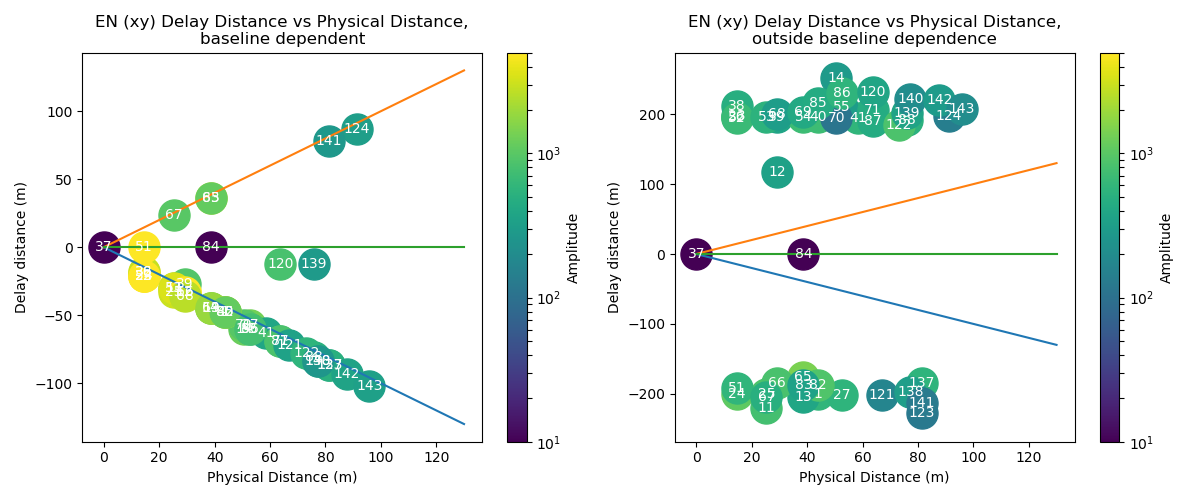

In [8]:
#Create an array which holds the delay times in meters
blin_delay_distance = blin_ants_delay_xy * c
#Create an array which holds the delay times in meters
ind_delay_distance = ind_ants_delay_xy * c * f

adp.plot_delay_position(amp_1 = blin_ants_amp_xy, delay_dis_1 = blin_delay_distance,
                        amp_2 = ind_ants_amp_xy, delay_dis_2 = ind_delay_distance,
                        index1 = index, index2 = index_ind, uv = uvx,
                        title1 = 'EN (xy) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'EN (xy) Delay Distance vs Physical Distance,\noutside baseline dependence')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


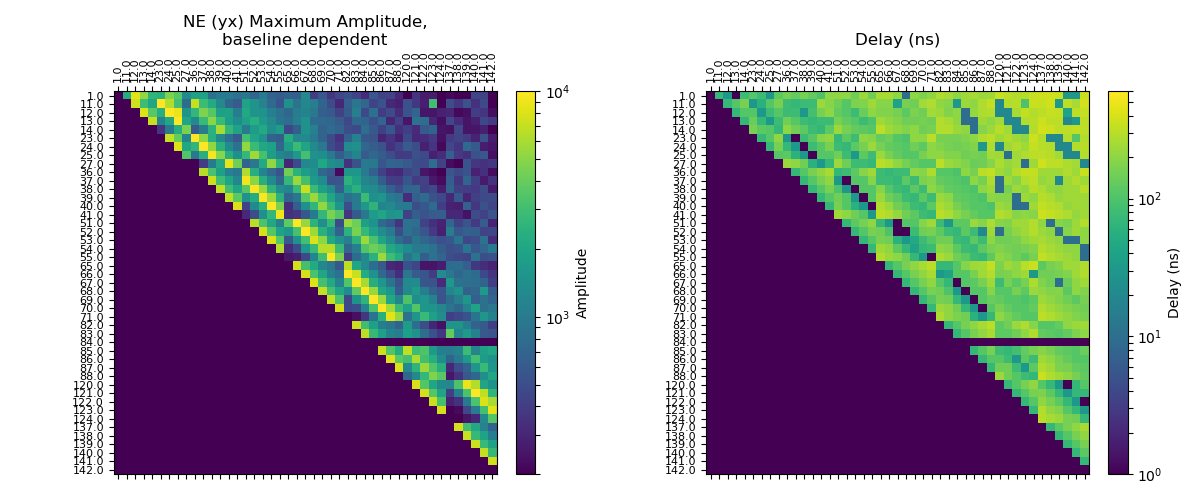

In [9]:
blin_amp_yx, blin_delay_yx = adp.make_blin_depd_arrays(uv = uvy)

print blin_delay_yx.shape
print blin_amp_yx.shape

blin_amp_matrix_yx, blin_delay_matrix_yx = adp.make_matrix_array(amp_array = blin_amp_yx, delay_array = blin_delay_yx)

print blin_amp_matrix_yx.shape
print blin_delay_matrix_yx.shape

adp.plot_matrix_array(amp_array = blin_amp_yx, amp_matrix = blin_amp_matrix_yx, delay_matrix = blin_delay_matrix_yx,
                      vmin = 1, vmax = 600, 
                      title = 'NE (yx) Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


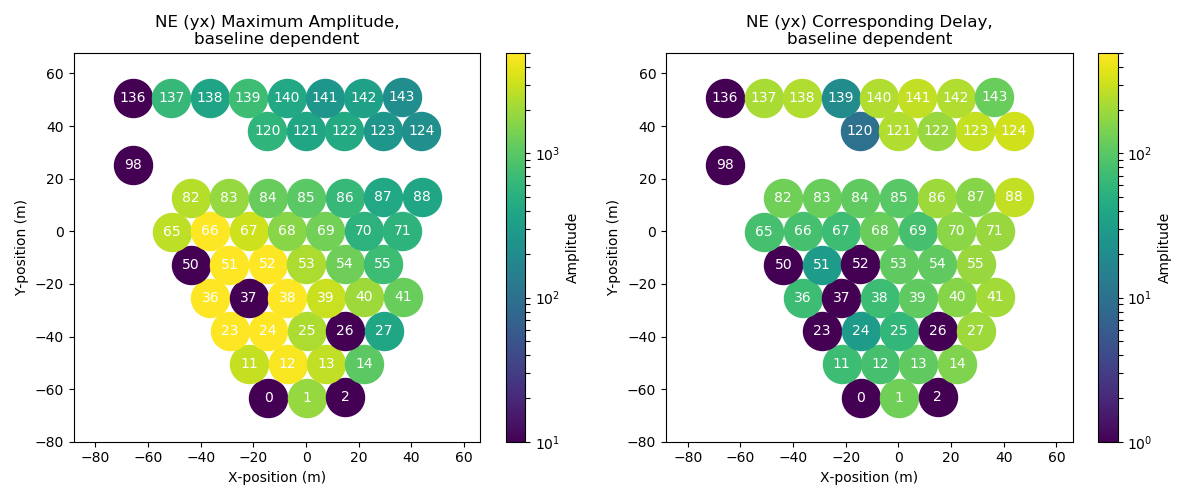

In [10]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_amp_yx, full_ant_delay_yx = adp.make_blin_depd_arrays(uv = uvy, keep_flags=True)
blin_ants_amp_yx, blin_ants_delay_yx, indeyx, dindeyx = adp.make_matrix_array(amp_array = full_ant_amp_yx, 
                                                                              delay_array=full_ant_delay_yx, 
                                                                              antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = blin_ants_amp_yx, delay_array = blin_ants_delay_yx,
                        index = indeyx, dindex = dindeyx, 
                        vmin = 1, vmax = 500, uv = uvy,
                        title1 = 'NE (yx) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'NE (yx) Corresponding Delay,\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


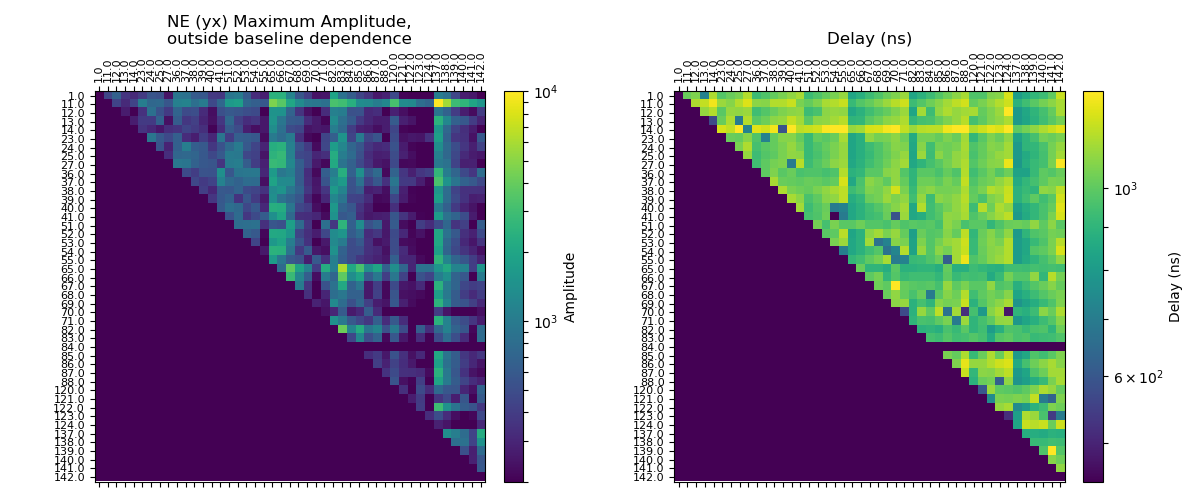

In [11]:
ind_amp_yx, ind_delay_yx = adp.make_blin_ind_arrays(uv = uvy)

print ind_delay_yx.shape
print ind_amp_yx.shape

ind_amp_matrix_yx, ind_delay_matrix_yx = adp.make_matrix_array(amp_array = ind_amp_yx, delay_array = ind_delay_yx)

print ind_amp_matrix_yx.shape
print ind_delay_matrix_yx.shape

adp.plot_matrix_array(amp_array = ind_amp_yx, amp_matrix = ind_amp_matrix_yx, delay_matrix = ind_delay_matrix_yx,
                      vmin = 450, vmax = 1300, title = 'NE (yx) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


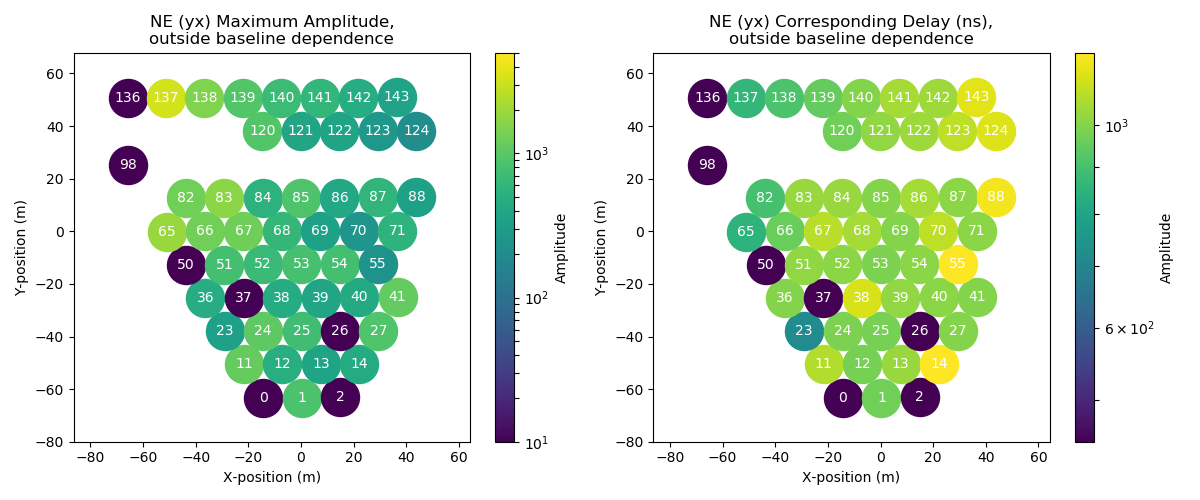

In [12]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_ind_amp_yx, full_ant_ind_delay_yx = adp.make_blin_ind_arrays(uv = uvy, keep_flags=True)
ind_ants_amp_yx, ind_ants_delay_yx, indeyx_ind, dindeyx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yx, 
                                                                                    delay_array = full_ant_ind_delay_yx, 
                                                                                    antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = ind_ants_amp_yx, delay_array = ind_ants_delay_yx,
                        index = indeyx_ind, dindex = dindeyx_ind,
                        vmin = 450, vmax = 1200, uv = uvy,
                        title1 = 'NE (yx) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'NE (yx) Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


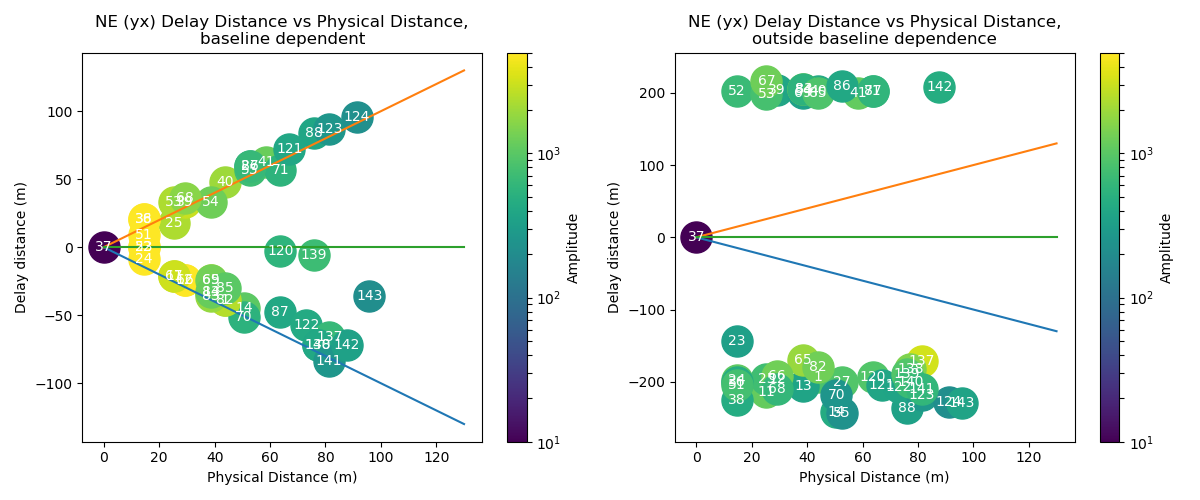

In [13]:
#Create an array which holds the delay times in meters
blin_delay_distance_yx = blin_ants_delay_yx * c

#Create an array which holds the delay times in meters
ind_delay_distance_yx = ind_ants_delay_yx * c * f

adp.plot_delay_position(amp_1 = blin_ants_amp_yx, delay_dis_1 = blin_delay_distance_yx,
                        amp_2 = ind_ants_amp_yx, delay_dis_2 = ind_delay_distance_yx,
                        index1 = indeyx, index2 = indeyx_ind, uv = uvy,
                        title1 = 'NE (yx) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'NE (yx) Delay Distance vs Physical Distance,\noutside baseline dependence')


(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


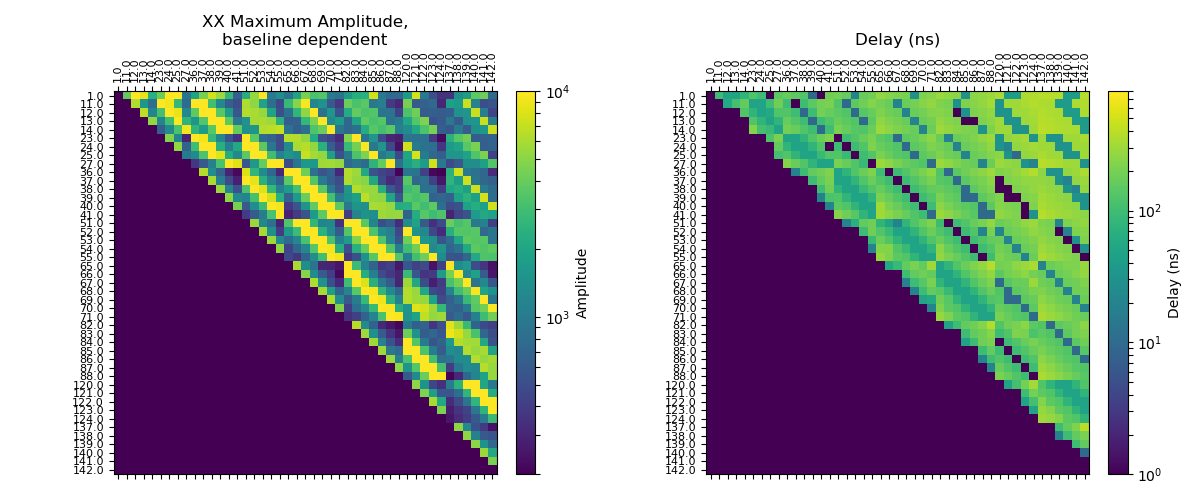

In [14]:
blin_amp_xx,blin_delay_xx = adp.make_blin_depd_arrays(uv = uvpx)

print blin_delay_xx.shape
print blin_amp_xx.shape

blin_amp_matrix_xx, blin_delay_matrix_xx = adp.make_matrix_array(amp_array = blin_amp_xx, delay_array = blin_delay_xx)

print blin_amp_matrix_xx.shape
print blin_delay_matrix_xx.shape

adp.plot_matrix_array(amp_array = blin_amp_xx, amp_matrix=blin_amp_matrix_xx, delay_matrix = blin_delay_matrix_xx,
                      vmin = 1, vmax = 800, title = 'XX Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


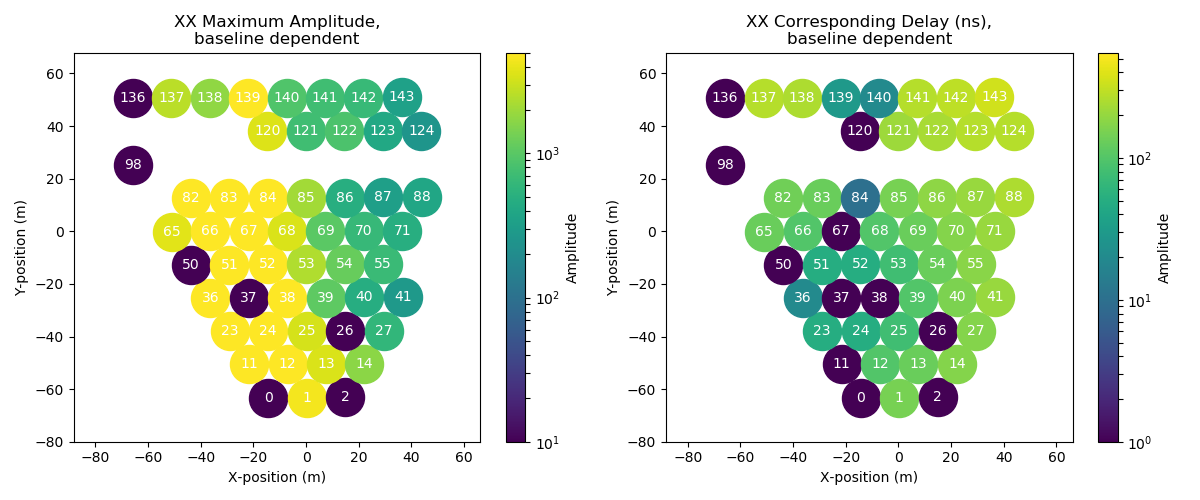

In [15]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_amp_xx, full_ant_delay_xx = adp.make_blin_depd_arrays(uv = uvpx, keep_flags=True)
blin_ants_amp_xx, blin_ants_delay_xx, indexx, dindexx = adp.make_matrix_array(amp_array = full_ant_amp_xx, 
                                                                              delay_array = full_ant_delay_xx, 
                                                                              antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = blin_ants_amp_xx, delay_array = blin_ants_delay_xx, 
                        index = indexx, dindex = dindexx, 
                        vmin = 1, vmax = 550, uv = uvpx, 
                        title1 = 'XX Maximum Amplitude,\nbaseline dependent',
                        title2 = 'XX Corresponding Delay (ns),\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


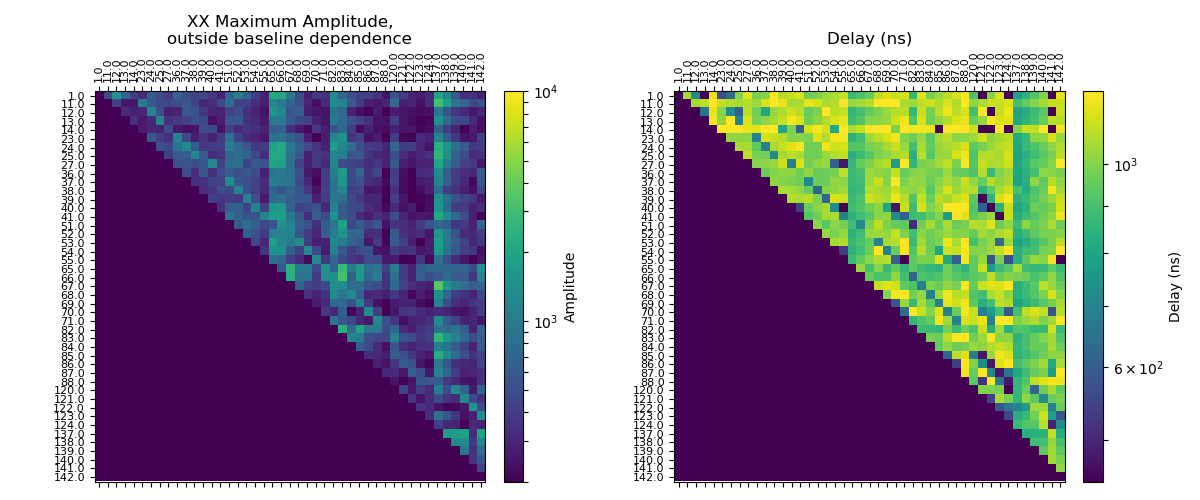

In [16]:
ind_amp_xx,ind_delay_xx = adp.make_blin_ind_arrays(uv = uvpx)

print ind_delay_xx.shape
print ind_amp_xx.shape

ind_amp_matrix_xx, ind_delay_matrix_xx = adp.make_matrix_array(amp_array = ind_amp_xx, delay_array = ind_delay_xx)

print ind_amp_matrix_xx.shape
print ind_delay_matrix_xx.shape

adp.plot_matrix_array(amp_array = ind_amp_xx, amp_matrix = ind_amp_matrix_xx, delay_matrix = ind_delay_matrix_xx,
                      vmin = 450, vmax = 1200, 
                      title = 'XX Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


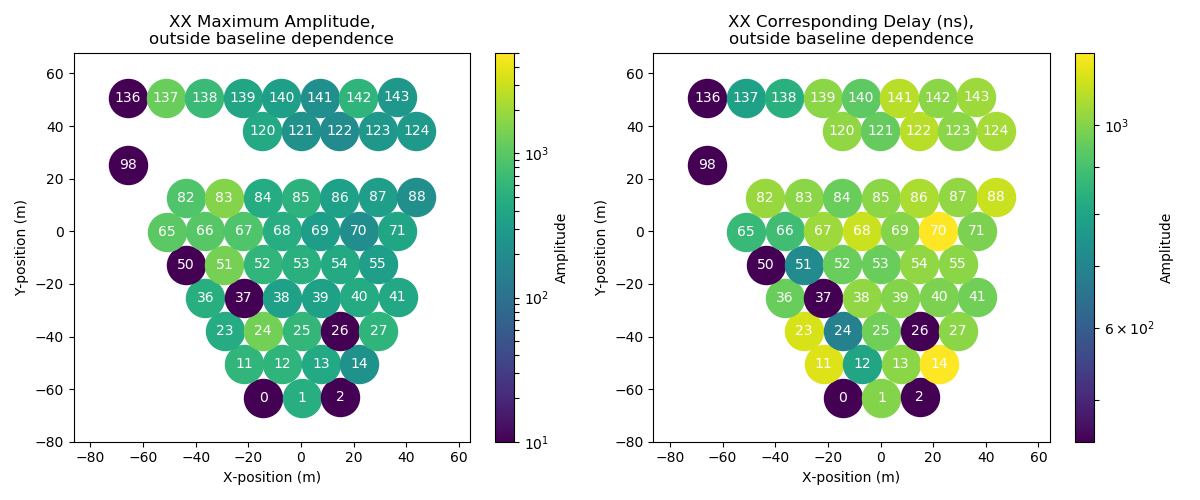

In [17]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_ind_amp_xx, full_ant_ind_delay_xx = adp.make_blin_ind_arrays(uv = uvpx, keep_flags=True)
ind_ants_amp_xx, ind_ants_delay_xx, indexx_ind, dindexx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_xx,
                                                                                    delay_array = full_ant_ind_delay_xx, 
                                                                                    antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = ind_ants_amp_xx, delay_array = ind_ants_delay_xx,
                        index = indexx_ind, dindex = dindexx_ind,
                        vmin = 450, vmax = 1200, uv = uvpx, 
                        title1 = 'XX Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'XX Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


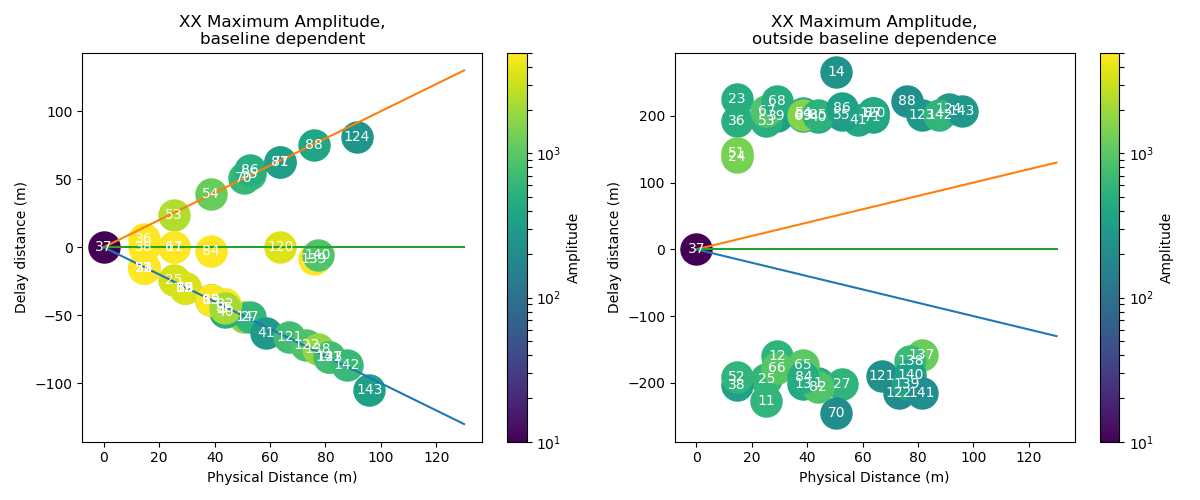

In [18]:
#Create an array which holds the delay times in meters
blin_delay_distance_xx = blin_ants_delay_xx * c

#Create an array which holds the delay times in meters
ind_delay_distance_xx = ind_ants_delay_xx * c * f

adp.plot_delay_position(amp_1 = blin_ants_amp_xx, delay_dis_1 = blin_delay_distance_xx, 
                        amp_2 = ind_ants_amp_xx, delay_dis_2 = ind_delay_distance_xx,
                        index1 = indexx, index2 = indexx_ind, uv = uvpx,
                        title1 = 'XX Maximum Amplitude,\nbaseline dependent',
                        title2 = 'XX Maximum Amplitude,\noutside baseline dependence')


(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


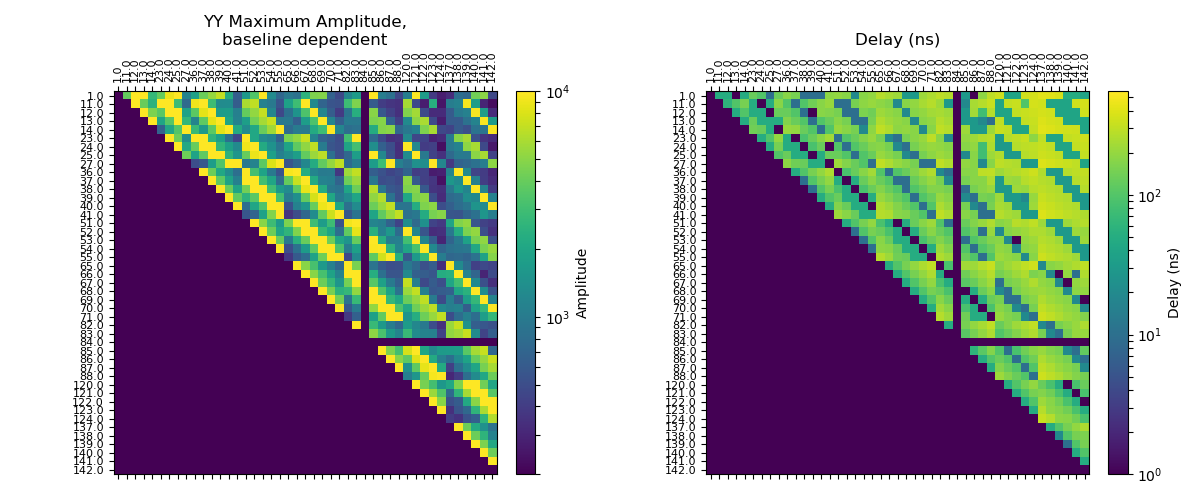

In [19]:
blin_amp_yy, blin_delay_yy = adp.make_blin_depd_arrays(uv = uvpy)

print blin_delay_yy.shape
print blin_amp_yy.shape

blin_amp_matrix_yy, blin_delay_matrix_yy = adp.make_matrix_array(amp_array = blin_amp_yy, delay_array = blin_delay_yy)

print blin_amp_matrix_yy.shape
print blin_delay_matrix_yy.shape

adp.plot_matrix_array(amp_array = blin_amp_yy, amp_matrix = blin_amp_matrix_yy, delay_matrix = blin_delay_matrix_yy,
                      vmin = 1, vmax = 550,
                      title='YY Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


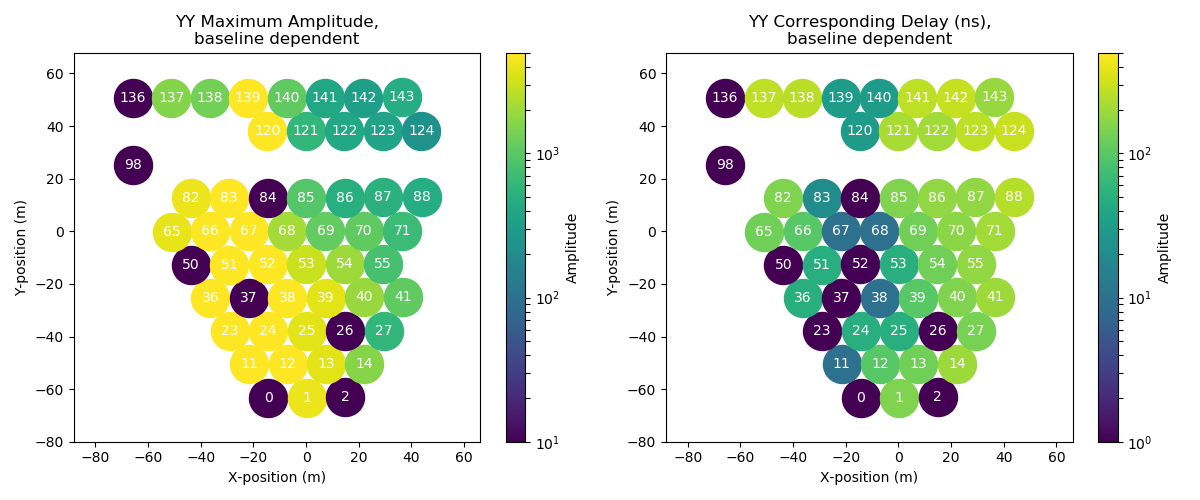

In [20]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_amp_yy, full_ant_delay_yy = adp.make_blin_depd_arrays(uv = uvpy, keep_flags=True)
blin_ants_amp_yy, blin_ants_delay_yy, indeyy, dindeyy = adp.make_matrix_array(amp_array = full_ant_amp_yy, 
                                                                              delay_array = full_ant_delay_yy, 
                                                                              antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = blin_ants_amp_yy, delay_array = blin_ants_delay_yy,
                        index = indeyy, dindex = dindeyy, uv = uvpy,
                        vmin = 1, vmax = 500,
                        title1 = 'YY Maximum Amplitude,\nbaseline dependent',
                        title2 = 'YY Corresponding Delay (ns),\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


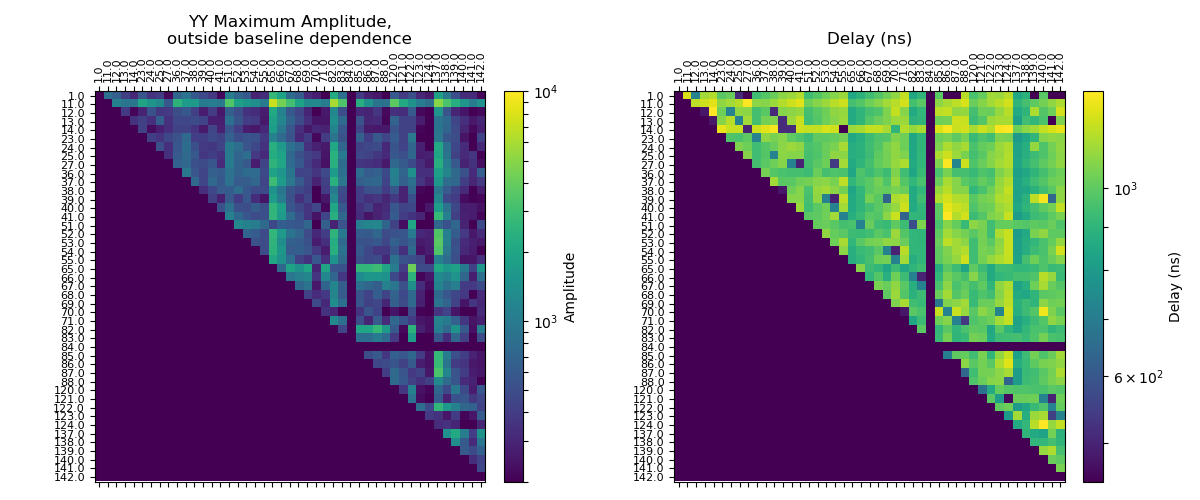

In [21]:
ind_amp_yy,ind_delay_yy = adp.make_blin_ind_arrays(uv = uvpy)

print ind_delay_yy.shape
print ind_amp_yy.shape

ind_amp_matrix_yy, ind_delay_matrix_yy = adp.make_matrix_array(amp_array = ind_amp_yy, delay_array = ind_delay_yy)

print ind_amp_matrix_yy.shape
print ind_delay_matrix_yy.shape

adp.plot_matrix_array(amp_array = ind_amp_yy, amp_matrix = ind_amp_matrix_yy, delay_matrix = ind_delay_matrix_yy,
                      vmin = 450, vmax = 1300, 
                      title = 'YY Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


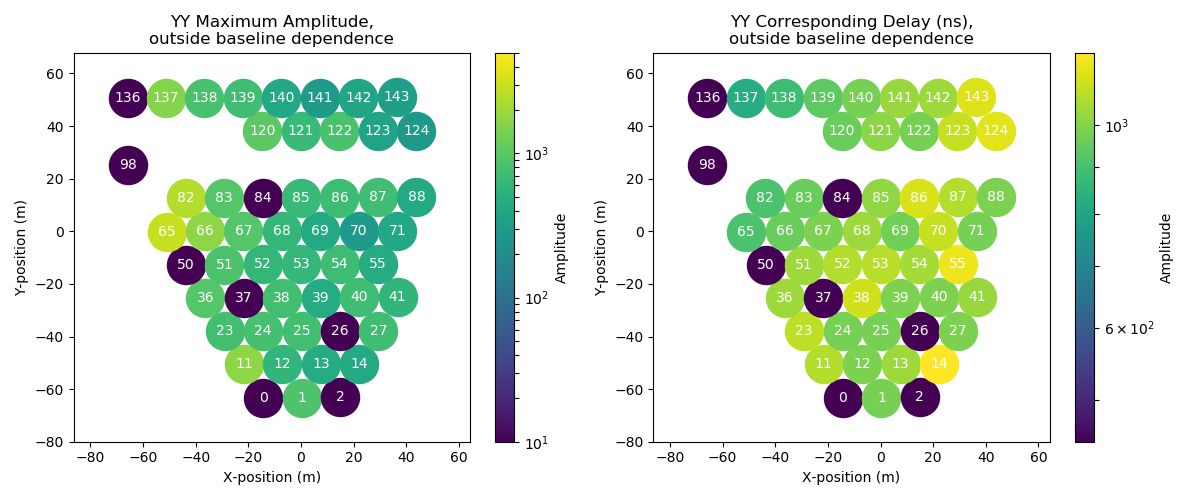

In [22]:
#Create the arrays for the maximum values and the matrix for xy
full_ant_ind_amp_yy, full_ant_ind_delay_yy = adp.make_blin_ind_arrays(uv = uvpy, keep_flags=True)
ind_ants_amp_yy, ind_ants_delay_yy, indeyy_ind, dindeyy_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yy,
                                                                                    delay_array = full_ant_ind_delay_yy,
                                                                                    antnum = focus_ant, index = True)

adp.plot_position_array(amp_array = ind_ants_amp_yy, delay_array = ind_ants_delay_yy,
                        index = indeyy_ind, dindex = dindeyy_ind, 
                        vmin = 450, vmax = 1200, uv = uvpy, 
                        title1 = 'YY Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'YY Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


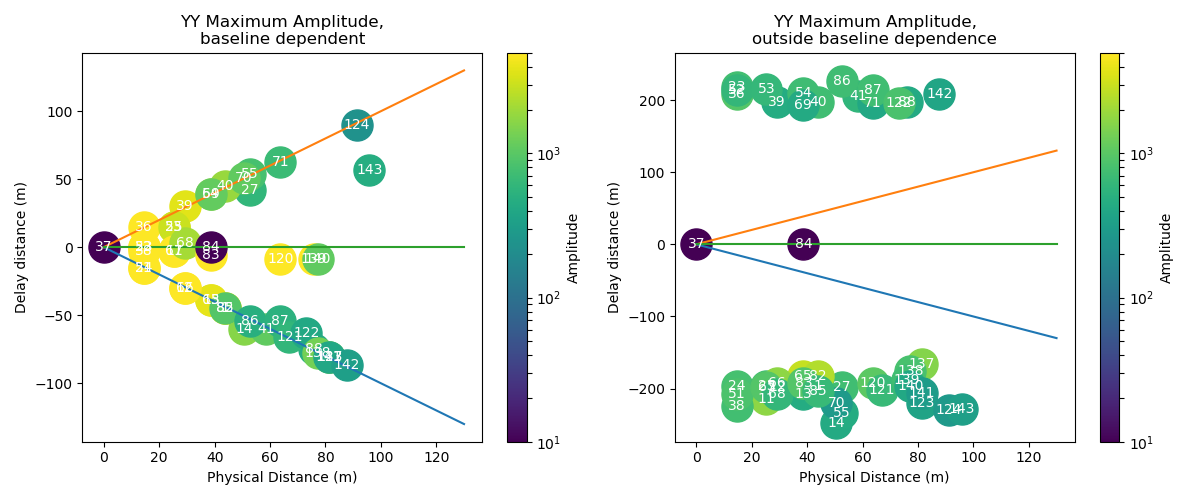

In [23]:
#Create an array which holds the delay times in meters
blin_delay_distance_yy = blin_ants_delay_yy * c

#Create an array which holds the delay times in meters
ind_delay_distance_yy = ind_ants_delay_yy * c * f

adp.plot_delay_position(amp_1 = blin_ants_amp_yy, delay_dis_1 = blin_delay_distance_yy,
                        amp_2 = ind_ants_amp_yy, delay_dis_2 = ind_delay_distance_yy,
                        index1 = indeyy, index2 = indeyy_ind, uv = uvpy,
                        title1 = 'YY Maximum Amplitude,\nbaseline dependent',
                        title2 = 'YY Maximum Amplitude,\noutside baseline dependence')


In [24]:
"""
for focus_ant in ants:
    #Create the arrays for the maximum values and the matrix for yx
    full_ant_amp_yy, full_ant_delay_yy = adp.make_max_arrays(uv = uvpy, keep_flags=True)
    all_ants_amp_yy, all_ants_delay_yy, indeyy, dindeyy = adp.make_matrix_array(amp_array = full_ant_amp_yy, 
                                                                                delay_array = full_ant_delay_yy, 
                                                                                antnum = focus_ant, index = True)

    #Plot the array of antennas with color representing amplitude for xy
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(antpos[:,0],antpos[:,1],marker='.',s=3000,color='w')
    for aa in range(52):
        #Get the amplitude value for the current antenna pair
        color = all_ants_amp_yy[indeyy,aa]
        #Convert into integer
        color = int(color)
        #Plot the antennas with the corresponding colors
        xim=plt.scatter(antpos[aa,0],antpos[aa,1],marker='.',s=3000,c=color,norm=SymLogNorm(vmin=10,vmax=5000,linthresh=.1))
    #Print the antetnna numbers
    for aa,ant in enumerate(ants):
        plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')
        #Print the entered antenna in red
        if ant==focus_ant: plt.scatter(antpos[aa,0],antpos[aa,1],marker='.',color='black',s=3000)
    plt.xlabel('X-position (m)')
    plt.ylabel('Y-position (m)')
    plt.title('NE antenna correlation')
    plt.axis('equal')
    plt.colorbar(xim)

    #Plot the array of antennas with color representing delay time
    plt.subplot(122)
    plt.scatter(antpos[:,0],antpos[:,1],marker='.',color='w',s=3000)
    for aa in range(52):
        #Get the delay value for the current antenna pair
        dcolor = all_ants_delay_yy[dindeyy,aa]
        #Convert into integer
        dcolor = int(dcolor)
        dcolor = np.abs(dcolor)
        #Plot the antennas with the corresponding colors
        dxim=plt.scatter(antpos[aa,0],antpos[aa,1],marker='.',s=3000,c=dcolor,norm=SymLogNorm(vmin=50,vmax=1500,linthresh=.1))
    #Print the antenna numbers
    for aa,ant in enumerate(ants):
        plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')
        #Print the entered antenna in red
        if ant==focus_ant: plt.scatter(antpos[aa,0],antpos[aa,1],marker='.',color='black',s=3000)
    plt.xlabel('X-position (m)')
    plt.ylabel('Y-position (m)')
    plt.title('YY Delay correlation')
    plt.axis('equal')
    plt.colorbar(dxim)

    plt.tight_layout()

    imname = '0' + str(focus_ant) + '_yy.png'
    plt.savefig('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/ant_array_imgs/yy_imgs/'+imname)
"""

"\nfor focus_ant in ants:\n    #Create the arrays for the maximum values and the matrix for yx\n    full_ant_amp_yy, full_ant_delay_yy = adp.make_max_arrays(uv = uvpy, keep_flags=True)\n    all_ants_amp_yy, all_ants_delay_yy, indeyy, dindeyy = adp.make_matrix_array(amp_array = full_ant_amp_yy, \n                                                                                delay_array = full_ant_delay_yy, \n                                                                                antnum = focus_ant, index = True)\n\n    #Plot the array of antennas with color representing amplitude for xy\n    plt.figure(figsize=(10,5))\n    plt.subplot(121)\n    plt.scatter(antpos[:,0],antpos[:,1],marker='.',s=3000,color='w')\n    for aa in range(52):\n        #Get the amplitude value for the current antenna pair\n        color = all_ants_amp_yy[indeyy,aa]\n        #Convert into integer\n        color = int(color)\n        #Plot the antennas with the corresponding colors\n        xim=plt.scatter